In [9]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np

to run this notebook, astropy is required
this notebook is designed to run with python2.7 using the configuration
described in this LIGO tutorial:
https://www.gw-openscience.org/static/workshop2/course.html
Instructions to install and configure python correctly are included in the preamble
to the tutorial described above

import the module I have written for you to 

In [ ]:
import gen_skydir as gs

Generate angles using the sampler function, but do not save to file, just 
save them in the computer memory
NOTE: every time you re-run this cell you will generate new samples
These are in radians - you can convert them to degrees or RA and DEC as needed (see below)

In [5]:
angles = gs.gen_uniform_sphere_sample(10, savetofile = False)

generated 10 sky direction samples


This next piece of code generates a Mollweide projected map of the locations generated above
on the sky

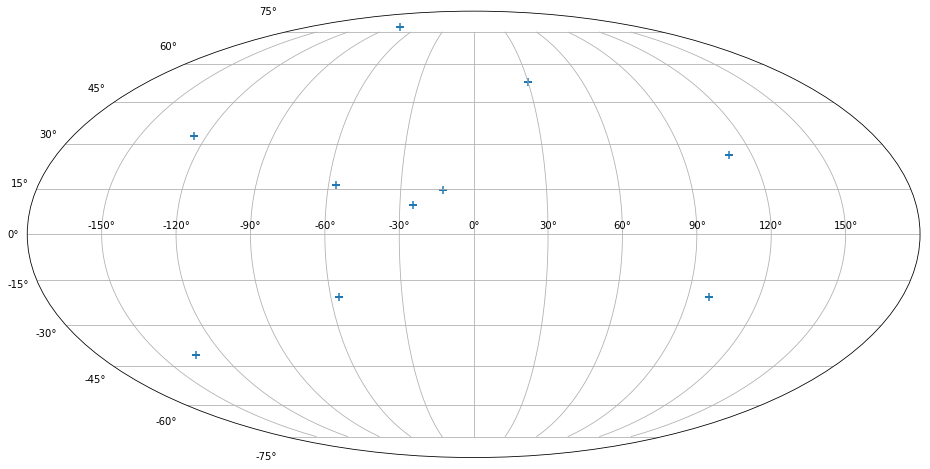

In [6]:
# plot the sky positions you have generated 
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(angles[:,0], angles[:,1], marker='+', s=50)
ax.grid(True)
plt.savefig('skydirections.png')

generate 10 sky positions using the sampler function, and save them to a file called
'anglesout.txt'
NOTE: every time you re-run this cell you will generate new samples, so these samples will
differ from those above!

In [7]:
angles = gs.gen_uniform_sphere_sample(10, savetofile = True, fname = 'anglesout.txt')

You can re-import this file using the numpy.loadtxt function

In [11]:
angles_from_file = np.loadtxt('anglesout.txt')
print(angles_from_file)

[[ 1.50806287 -0.23024379]
 [-1.07994338 -0.3349665 ]
 [ 2.57299148  0.07953098]
 [ 1.51682907  0.41918688]
 [-2.10654334 -0.67893461]
 [ 2.13149206  1.47524476]
 [-0.77609636  0.50018918]
 [-1.53630022 -0.76724336]
 [-2.28539081  0.51170303]
 [-2.3026747  -0.26012195]]


Converting these angles to degrees using astropy

In [12]:
from astropy import units
from astropy.coordinates import SkyCoord

In [15]:
angles_deg = SkyCoord(ra=angles_from_file[:,0]*units.radian,
                      dec=angles_from_file[:,1]*units.radian,
                     frame = 'icrs')

print(angles_deg)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 86.40563777, -13.19199724), (298.12380194, -19.19216669),
     (147.42155256,   4.55678958), ( 86.90790417,  24.01763883),
     (239.30395728, -38.90008758), (122.12549927,  84.52529871),
     (315.53295425,  28.65872898), (271.97648114, -43.95980633),
     (229.05675208,  29.31842406), (228.06645814, -14.90389013)]>


More astropy functionality here https://docs.astropy.org/en/stable/coordinates/